In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [9]:
# Load the dataset
df = pd.read_csv("City_Air_Quality.csv")
df.head()

,Date,Time,PM2.5,PM10,CO,Temperature (Celsius),Humidity (%),AQI
0,2023-01-01,22:9,28.764118,86.557573,9.633302,21.282759,78.306113,41
1,2023-01-02,5:6,41.472512,19.038690,1.162788,-9.910281,27.386865,20
2,2023-01-03,19:15,149.493083,145.076811,6.464694,24.986303,21.136802,100
3,2023-01-04,12:16,113.398596,67.165195,3.457812,-3.619716,50.964295,61
4,2023-01-05,19:28,159.584653,183.961404,7.947143,4.841017,40.837332,117


In [10]:
# Convert the 'Date' and 'Time' columns into a single 'datetime' column
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%Y-%m-%d %H:%M')

In [11]:
# Check for missing values and handle them (e.g., dropping rows with missing data)
df = df.dropna()

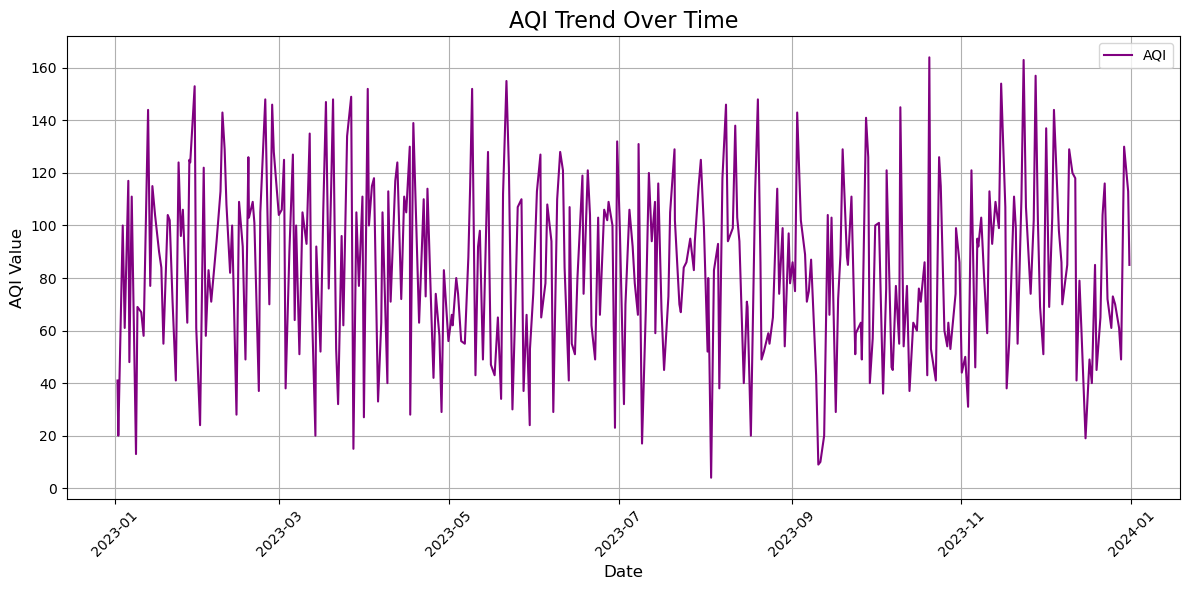

In [12]:
# Plot AQI Trend Over Time (Matplotlib)
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['AQI'], color='purple', label='AQI')
plt.title("AQI Trend Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("AQI Value", fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


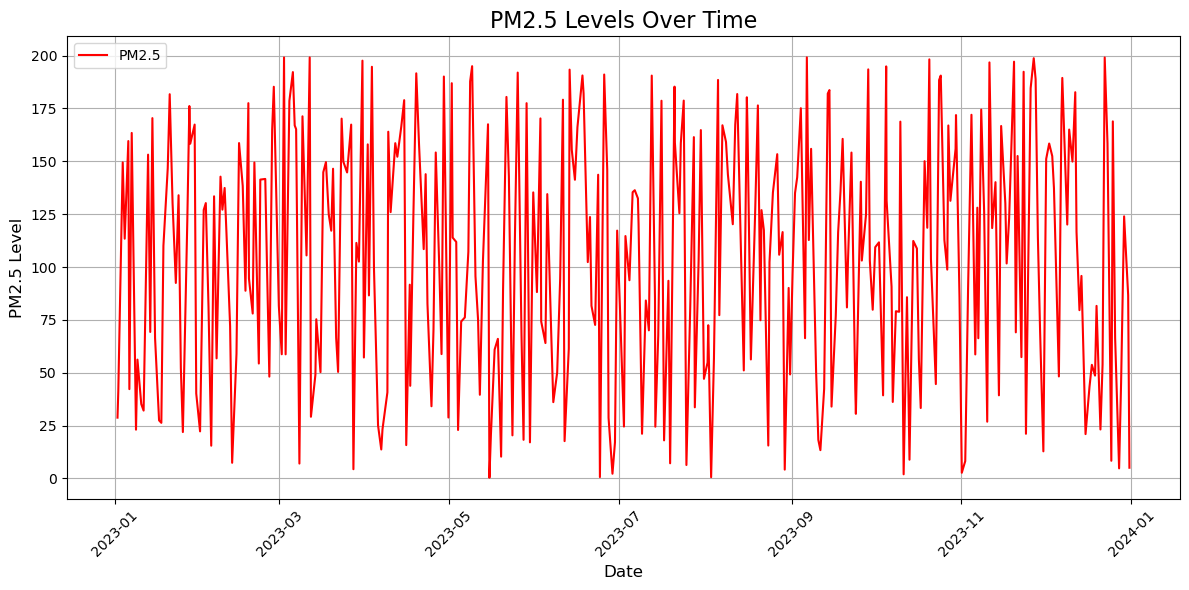

In [13]:
# Plot PM2.5 Trend Over Time (Matplotlib)
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['PM2.5'], color='red', label='PM2.5')
plt.title("PM2.5 Levels Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("PM2.5 Level", fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


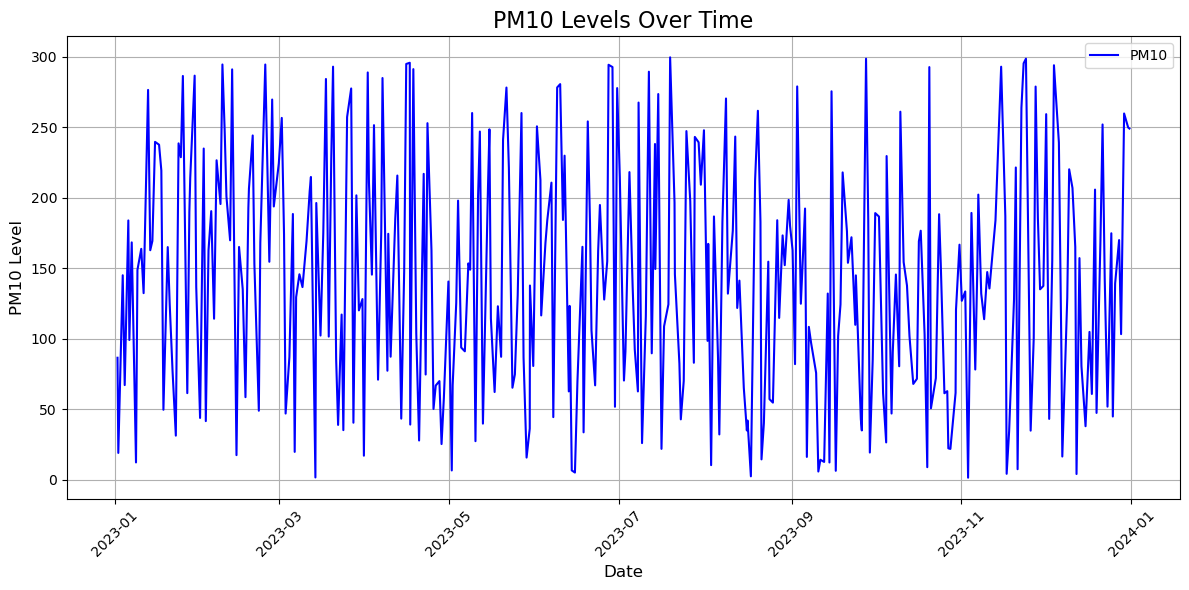

In [14]:
# Plot PM10 Trend Over Time (Matplotlib)
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['PM10'], color='blue', label='PM10')
plt.title("PM10 Levels Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("PM10 Level", fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

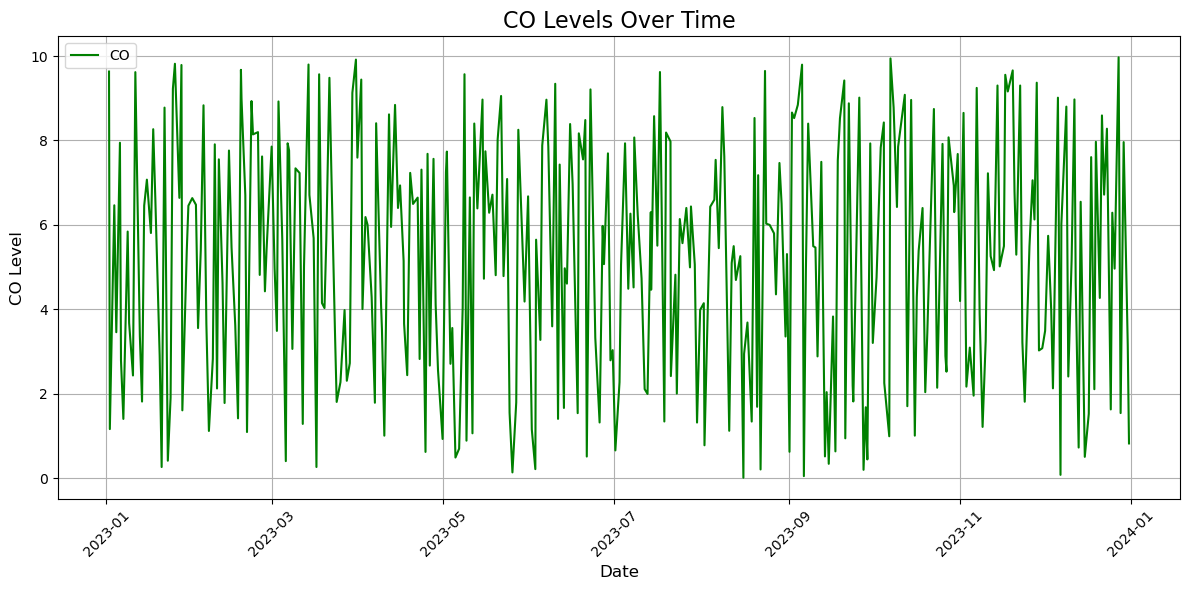

In [15]:
# Plot CO Trend Over Time (Matplotlib)
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['CO'], color='green', label='CO')
plt.title("CO Levels Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("CO Level", fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Plot Daily Average AQI using Plotly
daily_aqi = df.set_index('datetime').resample('D')['AQI'].mean().dropna()
fig = go.Figure()
fig.add_trace(go.Bar(
    x=daily_aqi.index,
    y=daily_aqi,
    marker=dict(color='cyan'),
    name='Daily Average AQI'
))
fig.update_layout(
    title="Daily Average AQI Values",
    xaxis_title="Date",
    yaxis_title="AQI",
    template="plotly_dark",
    xaxis=dict(tickangle=45)
)
fig.show()

In [17]:
# Boxplot for AQI and Pollutants using Plotly
fig = px.box(df, y=['AQI', 'PM2.5', 'PM10', 'CO'], 
             title="Distribution of AQI and Pollutant Levels", 
             labels={"value": "Level", "variable": "Pollutant"})
fig.update_layout(template="plotly_dark")
fig.show()

In [18]:
# Scatter Plot for AQI vs PM2.5 using Plotly
fig = px.scatter(df, x='PM2.5', y='AQI', 
                 title="AQI vs PM2.5 Levels", 
                 labels={'PM2.5': 'PM2.5 Level', 'AQI': 'AQI'})
fig.update_layout(template="plotly_dark")
fig.show()

In [19]:

# Scatter Plot for AQI vs PM10 using Plotly
fig = px.scatter(df, x='PM10', y='AQI', 
                 title="AQI vs PM10 Levels", 
                 labels={'PM10': 'PM10 Level', 'AQI': 'AQI'})
fig.update_layout(template="plotly_dark")
fig.show()

In [20]:

# Scatter Plot for AQI vs CO using Plotly
fig = px.scatter(df, x='CO', y='AQI', 
                 title="AQI vs CO Levels", 
                 labels={'CO': 'CO Level', 'AQI': 'AQI'})
fig.update_layout(template="plotly_dark")
fig.show()